# Keras 

In [1]:
# Importando librarías
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

2024-03-18 21:25:19.816827: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 21:25:19.819497: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 21:25:19.855322: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-18 21:25:20.621944: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Regresión lineal y=mx+b+ruido

In [2]:
m = 2
b = 3
x = np.linspace(0,50,100)

# vamos a fijar una semilla en 101, un valor aleatorio para asegurarnos de que obtengas los mismos resultados que yo!
np.random.seed(101) 
ruido = np.random.normal(loc=0.0,scale=4.0,size=len(x))

In [3]:
y = m*x + b + ruido

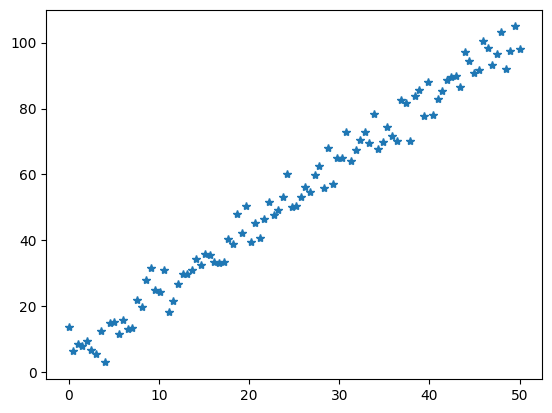

In [4]:
plt.plot(x,y,'*');

## Creando una Red Neuronal para una Regresión

In [5]:
from keras.models import Sequential
from keras.layers import Dense

In [6]:
model = Sequential()
# 4 Neuronas, esperamos solo 1 input 
model.add(Dense(4, input_dim=1, activation='relu'))
# 4 Neuronas
model.add(Dense(2, activation='relu'))
# Solo 1 neurona porque solo tenemos 1 output que es Y
model.add(Dense(1, activation='relu'))
# Compilamos todas las capas
model.compile(loss='mse', optimizer='adam')

/home/bbchanchis/curso-series-temporales/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

## Entrenamiento de la red

** NOTA: EN ESTE EJEMPLO VAMOS A SALTARNOS EL PASO DE DIVIDIR LOS DATOS EN ENTRENAMIENTO Y PRUEBA!!!! **

In [8]:
model.fit(x, y, epochs=200, verbose=1)

Epoch 1/200


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2435.3105  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2290.1733 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2350.7144 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2416.1526 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2369.3120 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2349.9858 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2248.5581 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2305.0347 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1982.4988 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2042.4680 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1897.4768 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2075.0654 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2069.0383 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1934.1206 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

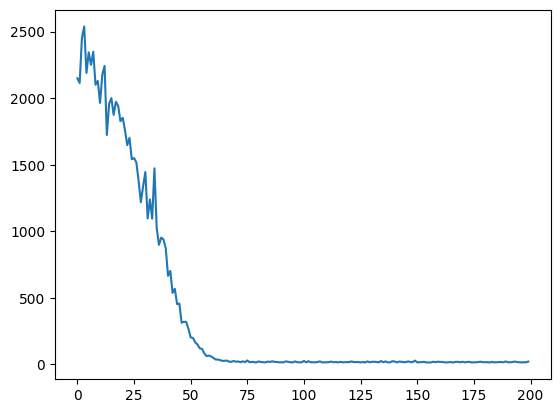

In [9]:
loss=model.history.history['loss']
epochs=range(len(loss))
plt.plot(epochs,loss)

## Prediciendo nuevos puntos con el modelo creado


In [10]:
x_for_predictions = np.linspace(0,50,1000)

In [11]:
y_predicted = model.predict(x_for_predictions)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


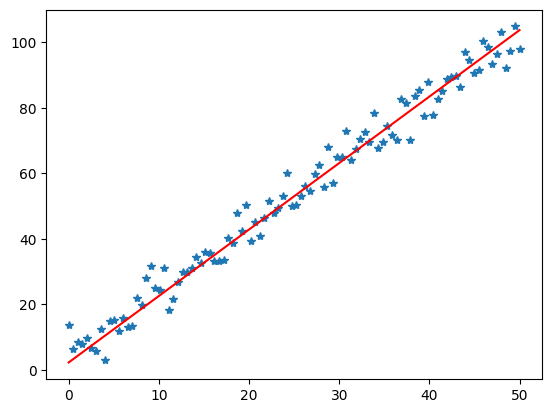

In [12]:
# X e Y originales
plt.plot(x,y,'*')
# Línea de predicción
plt.plot(x_for_predictions,y_predicted,'r');

# Evaluando el error

In [13]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [14]:
# Predicciones
prediction_for_true_y = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [15]:
mean_squared_error(y,prediction_for_true_y)

18.176739046516424

In [16]:
mean_absolute_error(y,prediction_for_true_y)

3.4692998839437155